In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
import yfinance as yf

In [4]:
from datetime import datetime

In [5]:
from __future__ import division

In [6]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [7]:
end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

In [8]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start = start, end = end, auto_adjust = False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
AAPL.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,221.842193,222.318360,224.568000,219.701160,221.988560,5.315833e+07
std,15.783415,15.941602,15.481198,16.270949,16.021806,2.746284e+07
min,172.194199,172.419998,190.339996,169.210007,171.949997,2.323470e+07
25%,210.317501,210.317501,212.442497,208.427498,210.150005,3.948688e+07
50%,223.278603,223.840004,225.695000,221.510002,224.160004,4.642275e+07
75%,232.292145,232.852497,234.584999,229.702499,232.607502,5.579590e+07
max,258.396667,259.019989,260.100006,257.630005,258.190002,3.186799e+08


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-07-19 to 2025-07-18
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  250 non-null    float64
 1   (Close, AAPL)      250 non-null    float64
 2   (High, AAPL)       250 non-null    float64
 3   (Low, AAPL)        250 non-null    float64
 4   (Open, AAPL)       250 non-null    float64
 5   (Volume, AAPL)     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [11]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-07-19 to 2025-07-18
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  250 non-null    float64
 1   (Close, GOOG)      250 non-null    float64
 2   (High, GOOG)       250 non-null    float64
 3   (Low, GOOG)        250 non-null    float64
 4   (Open, GOOG)       250 non-null    float64
 5   (Volume, GOOG)     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [12]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-07-19 to 2025-07-18
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, MSFT)  250 non-null    float64
 1   (Close, MSFT)      250 non-null    float64
 2   (High, MSFT)       250 non-null    float64
 3   (Low, MSFT)        250 non-null    float64
 4   (Open, MSFT)       250 non-null    float64
 5   (Volume, MSFT)     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [13]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-07-19 to 2025-07-18
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AMZN)  250 non-null    float64
 1   (Close, AMZN)      250 non-null    float64
 2   (High, AMZN)       250 non-null    float64
 3   (Low, AMZN)        250 non-null    float64
 4   (Open, AMZN)       250 non-null    float64
 5   (Volume, AMZN)     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<Axes: xlabel='Date'>

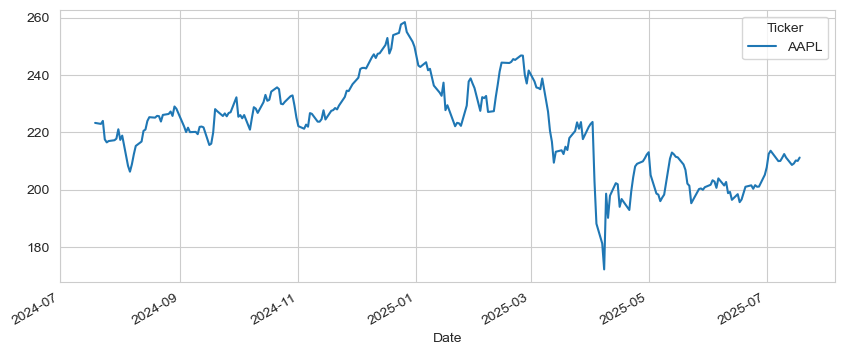

In [14]:
AAPL['Adj Close'].plot(legend = True, figsize = (10, 4))

<Axes: xlabel='Date'>

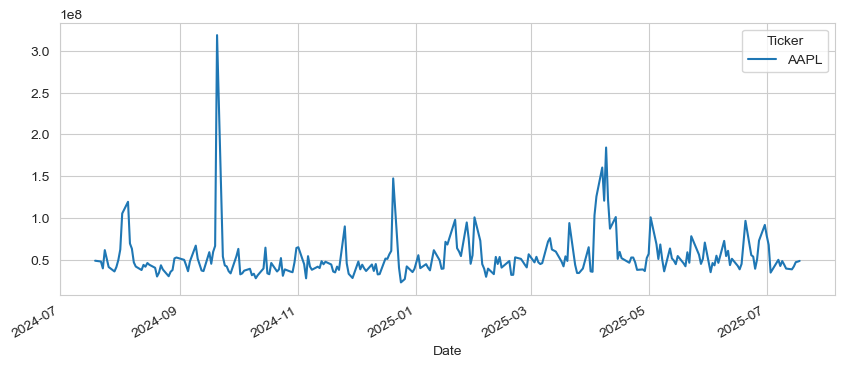

In [15]:
AAPL['Volume'].plot(legend = True, figsize = (10, 4))

In [16]:
ma_days = [10, 20 ,50]

for ma in ma_days:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

<Axes: xlabel='Date'>

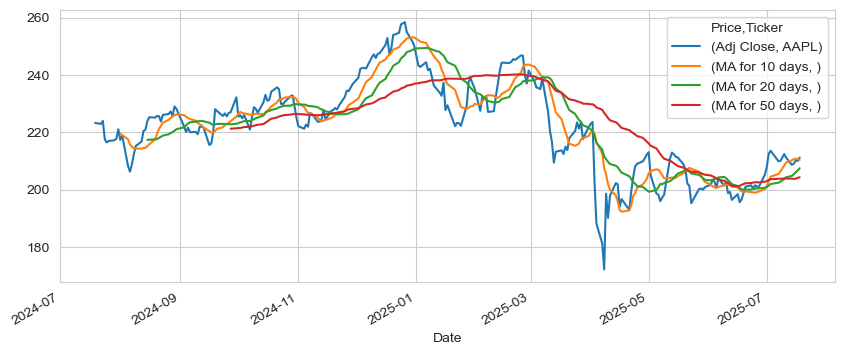

In [17]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (10, 4))

<Axes: xlabel='Date'>

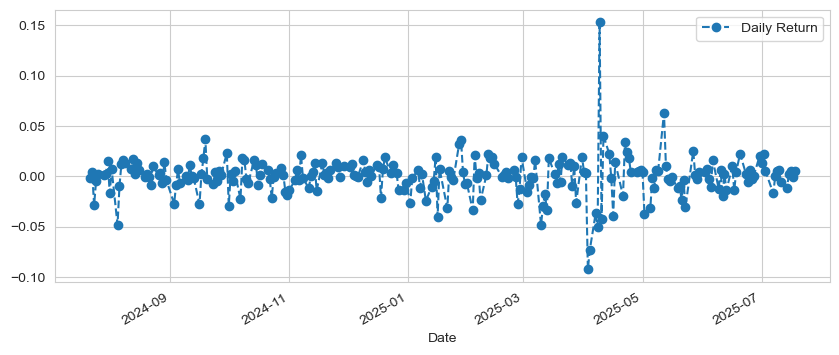

In [18]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize = (10, 4), legend = True, linestyle = '--', marker = 'o')

<Axes: xlabel='Daily Return', ylabel='Count'>

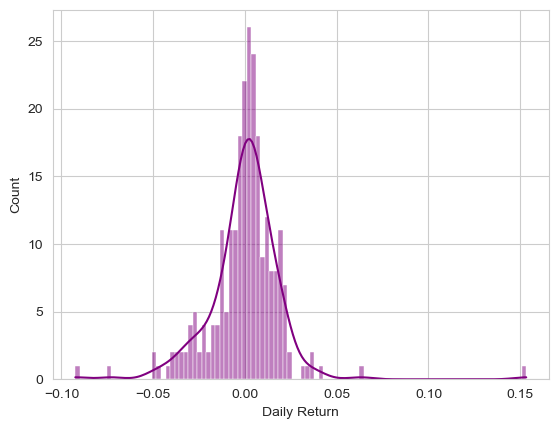

In [19]:
sns.histplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple', kde = True)

<Axes: >

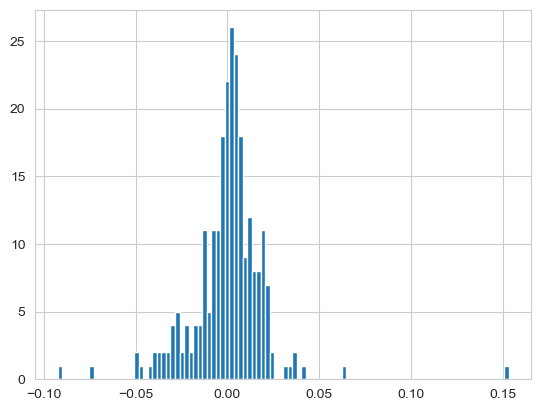

In [20]:
AAPL['Daily Return'].hist(bins = 100)

In [21]:
closing_df = yf.download(tech_list, start = start, end = end, auto_adjust = False)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [22]:
closing_df.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-07-19,223.265839,183.130005,178.532898,433.784180
2024-07-22,222.917480,182.550003,182.473999,439.569824
2024-07-23,223.962601,186.410004,182.722809,441.465302
2024-07-24,217.522720,180.830002,173.536896,425.636658
2024-07-25,216.477615,179.850006,168.351791,415.216553


In [23]:
tech_rets = closing_df.pct_change()

In [24]:
tech_rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-07-19,NaN,NaN,NaN,NaN
2024-07-22,-0.001560,-0.003167,0.022075,0.013338
2024-07-23,0.004688,0.021145,0.001364,0.004312
2024-07-24,-0.028754,-0.029934,-0.050272,-0.035855
2024-07-25,-0.004805,-0.005419,-0.029879,-0.024481


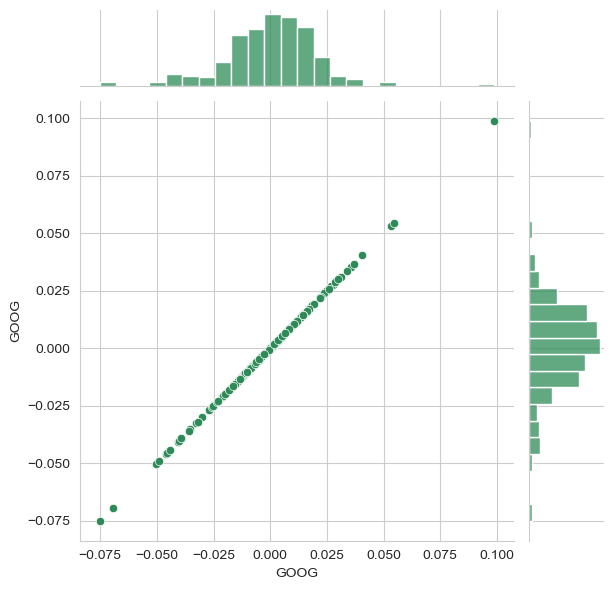

In [25]:
sns.jointplot(x = 'GOOG', y = 'GOOG', data = tech_rets, kind = 'scatter', color = 'seagreen')

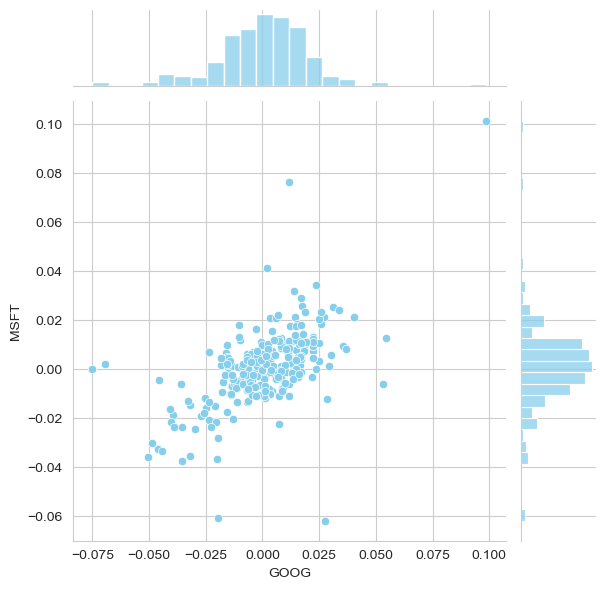

In [26]:
sns.jointplot(x = 'GOOG', y = 'MSFT', data = tech_rets, kind = 'scatter', color = 'skyblue')

In [27]:
tech_rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-07-19,NaN,NaN,NaN,NaN
2024-07-22,-0.001560,-0.003167,0.022075,0.013338
2024-07-23,0.004688,0.021145,0.001364,0.004312
2024-07-24,-0.028754,-0.029934,-0.050272,-0.035855
2024-07-25,-0.004805,-0.005419,-0.029879,-0.024481


c:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


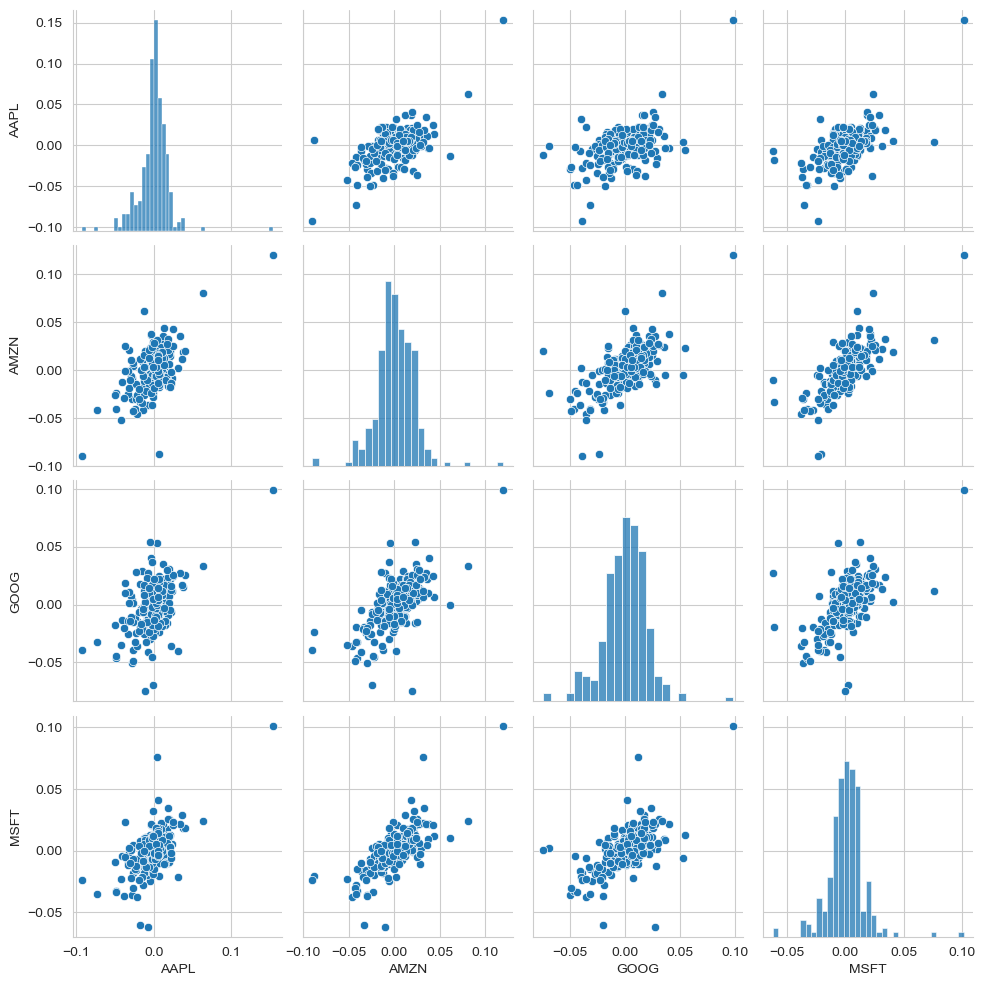

In [29]:
sns.pairplot(tech_rets, dropna = True)

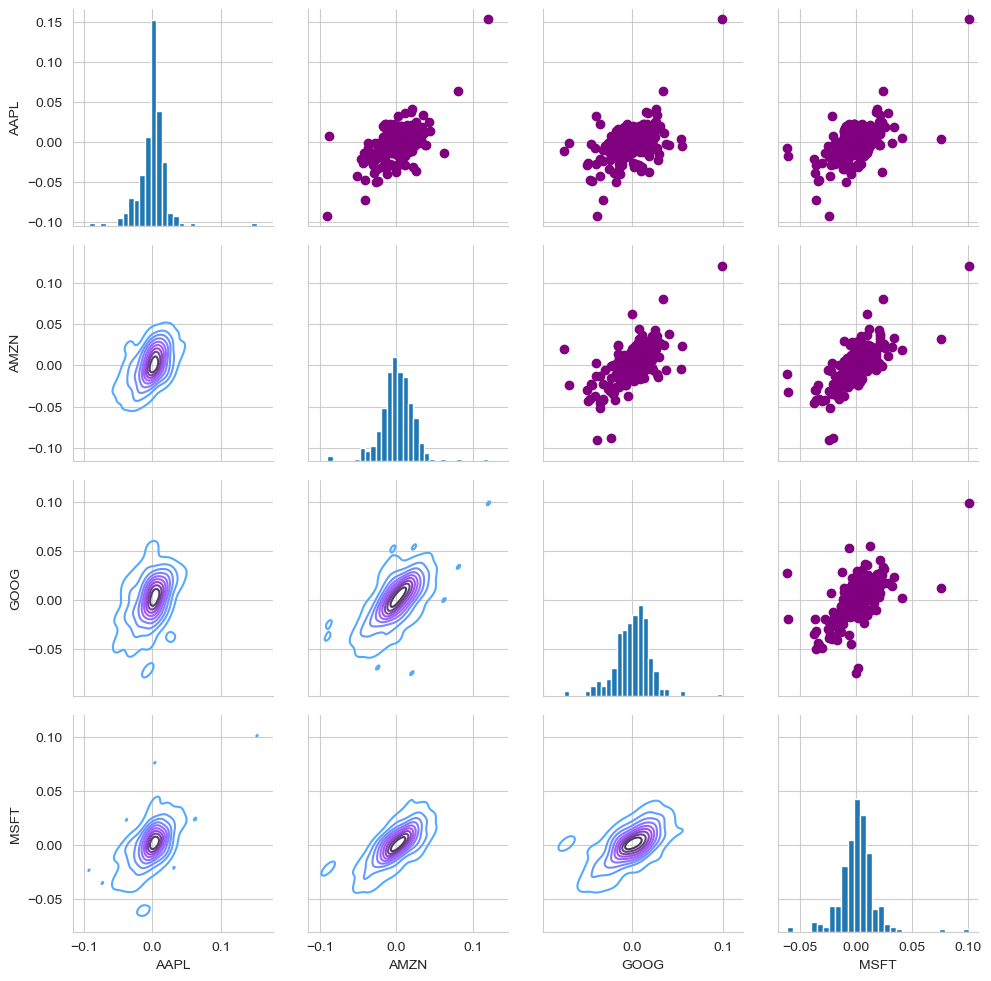

In [31]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color = 'purple')
returns_fig.map_lower(sns.kdeplot,cmap = 'cool_d')
returns_fig.map_diag(plt.hist, bins=30)

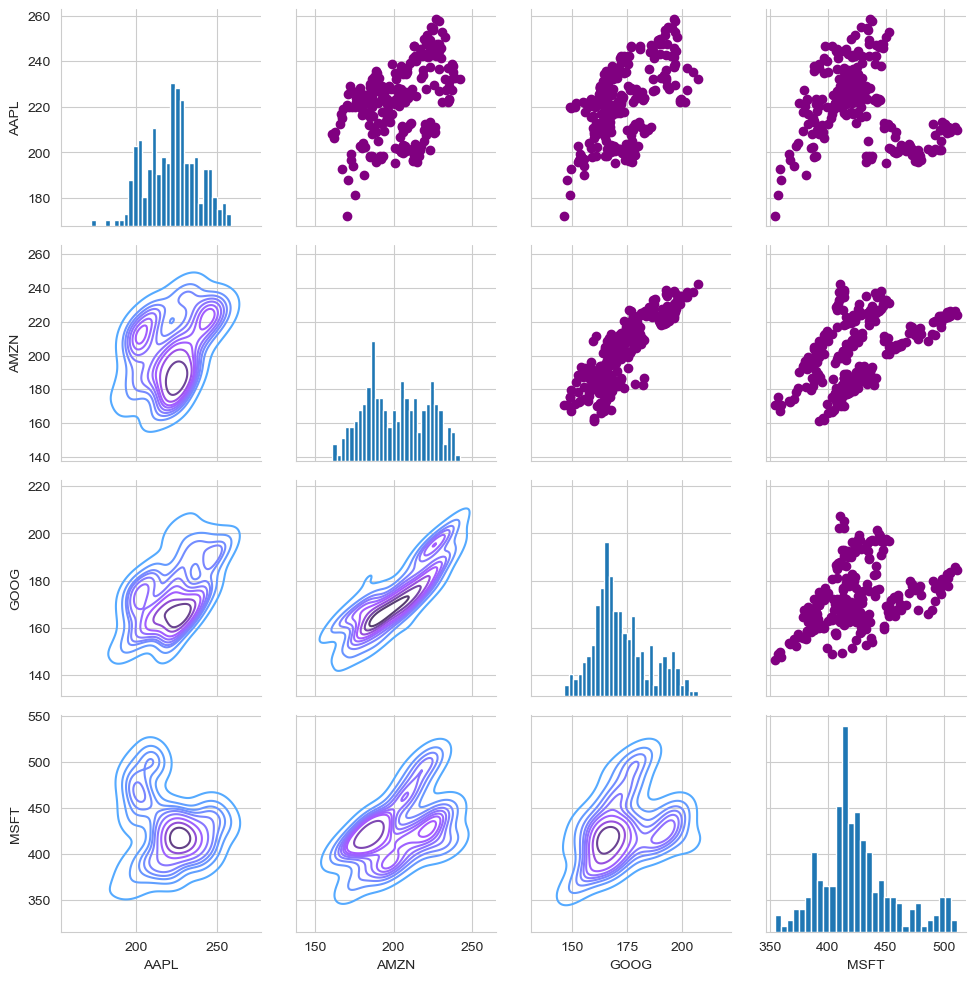

In [32]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color = 'purple')
returns_fig.map_lower(sns.kdeplot,cmap = 'cool_d')
returns_fig.map_diag(plt.hist, bins=30)

<Axes: xlabel='Ticker', ylabel='Ticker'>

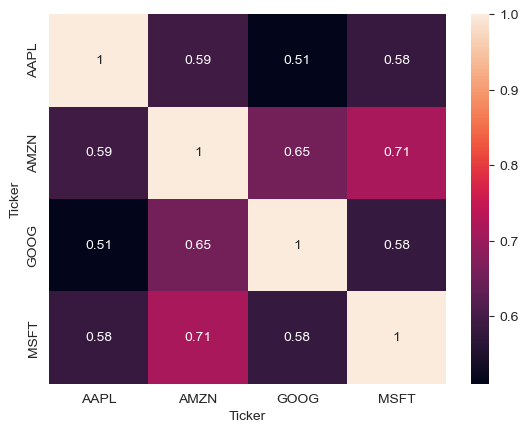

In [36]:
sns.heatmap(tech_rets.dropna().corr(), annot = True)

<Axes: xlabel='Ticker', ylabel='Ticker'>

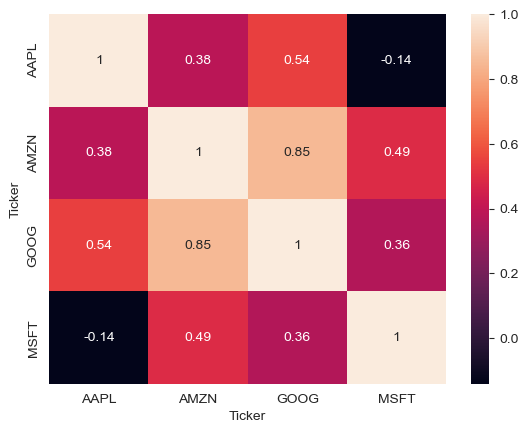

In [37]:
sns.heatmap(closing_df.corr(), annot = True)

In [38]:
rets = tech_rets.dropna()

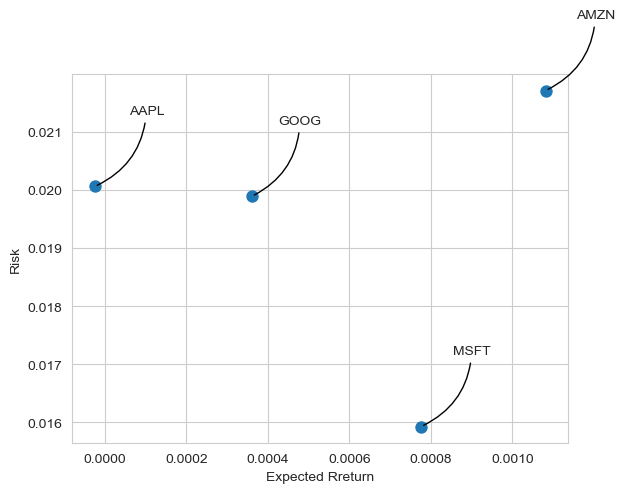

In [41]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(), s = area)

plt.xlabel('Expected Rreturn')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad = -0.3', color = 'black')
    )